In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [196]:
import pymysql
config = {
    'host': '192.168.1.31',
    'port': 4000,
    'user': 'liyufan',
    'passwd': 'liyufan@2020',
    'charset':'utf8mb4',
    'cursorclass':pymysql.cursors.DictCursor
    }
conn = pymysql.connect(**config)

In [3]:
sql = "select a.OpAreaId as area_id,b.area_sku,b.skusn as sku,b.product_name,b.product_spec,b.category_id,b.category_name," \
              "b.parent_category_id,b.parent_category_name," \
              "b.vendor_code,a.DeliveryDate,b.sale_unit_qty,b.sale_stock_qty,c.stock_qty " \
              "from xsyx_logistics_product.tb_product_skusn_advance a,xsyx_logistics_product.tb_product_skusn b " \
              " LEFT JOIN xsyx_logistics_product.tb_product_storage_ref c " \
              " on b.storage_ref_id=c.id and c.unit_name is not null and c.is_delete=0 " \
              " where a.OpAreaId=101 and a.DeliveryDate BETWEEN '2021-01-01' and '2021-02-01' and a.SkuSn=b.skusn and skusn_status<>'DELETED' ORDER BY b.area_sku"

In [4]:
df = pd.read_sql(sql,conn)

In [6]:
df2 = pd.read_sql(sql2,conn)

In [7]:
df.head()

,area_id,area_sku,sku,product_name,product_spec,category_id,category_name,parent_category_id,parent_category_name,vendor_code,DeliveryDate,sale_unit_qty,sale_stock_qty,stock_qty
0,101,0385371,002256152,佳来享 太合精品鸡肠500g/包正负20g,500g正负20g,568,03012鸡内脏,556,03禽类,0018047,2021-01-26,1,1,20.0
1,101,0385371,001885096,佳来享 太合精品鸡肠500g/包正负20g,500g正负20g,568,03012鸡内脏,556,03禽类,0018047,2021-01-01,1,1,20.0
2,101,0385371,002067695,佳来享 太合精品鸡肠500g/包正负20g,500g正负20g,568,03012鸡内脏,556,03禽类,0018047,2021-01-14,1,1,20.0
3,101,0385371,002081672,佳来享 太合精品鸡肠500g/包正负20g,500g正负20g,568,03012鸡内脏,556,03禽类,0018047,2021-01-15,1,1,20.0
4,101,0385371,002318762,佳来享 太合精品鸡肠500g/包正负20g,500g正负20g,568,03012鸡内脏,556,03禽类,0018047,2021-01-30,1,1,20.0


In [10]:
df2.head(10)

,SKU,ProductName,PickQty,EndPickingTime,StartPickingTime,DeliveryTime
0,001871769,饪丰 国产整片五花肉（带排骨）【大份装】10斤/件正负0.3斤,120.0,2020-12-31 20:09:56,2020-12-31 19:53:39,2021-01-01
1,001871769,饪丰 国产整片五花肉（带排骨）【大份装】10斤/件正负0.3斤,116.0,2020-12-31 20:54:15,2020-12-31 20:28:13,2021-01-01
2,001871769,饪丰 国产整片五花肉（带排骨）【大份装】10斤/件正负0.3斤,92.0,2021-01-01 04:16:29,2021-01-01 04:09:29,2021-01-01
3,001871769,饪丰 国产整片五花肉（带排骨）【大份装】10斤/件正负0.3斤,28.0,2021-01-01 04:09:12,2021-01-01 04:05:16,2021-01-01
4,001871769,饪丰 国产整片五花肉（带排骨）【大份装】10斤/件正负0.3斤,70.0,2020-12-31 21:26:04,2020-12-31 21:04:05,2021-01-01
5,001871769,饪丰 国产整片五花肉（带排骨）【大份装】10斤/件正负0.3斤,30.0,2021-01-01 04:02:00,2021-01-01 03:44:51,2021-01-01
6,001871769,饪丰 国产整片五花肉（带排骨）【大份装】10斤/件正负0.3斤,24.0,2021-01-01 04:21:50,2021-01-01 04:20:10,2021-01-01
7,001871769,饪丰 国产整片五花肉（带排骨）【大份装】10斤/件正负0.3斤,120.0,2020-12-31 20:26:00,2020-12-31 20:10:18,2021-01-01
8,001871769,饪丰 国产整片五花肉（带排骨）【大份装】10斤/件正负0.3斤,24.0,2020-12-31 21:03:54,2020-12-31 20:56:30,2021-01-01
9,001884379,志良 新苗贝贝南瓜300g/袋正负30g,48.0,2021-01-01 02:07:07,2021-01-01 02:04:36,2021-01-01


In [11]:
df2['duration']=df2['EndPickingTime']-df2['StartPickingTime'] 

In [12]:
product_picking = []
for sku in df2['SKU'].unique():
    for deliverytime in df2.loc[df2.SKU==sku]['DeliveryTime'].unique():
        duration = df2.loc[(df2.DeliveryTime == deliverytime)&(df2.SKU == sku)]['duration'].sum()
        total_PickQty = df2.loc[(df2.DeliveryTime == deliverytime)&(df2.SKU == sku)]['PickQty'].sum()
        product_picking.append({'SKU':sku, 'total_PickQty':total_PickQty, 'DeliveryTime':deliverytime, 'duration':duration})
df3=pd.DataFrame(product_picking)    

In [13]:
df3['duration'] = df3['duration'].dt.total_seconds()/60

In [14]:
df3['DeliveryTime'] = df3['DeliveryTime'].dt.strftime("%Y-%m-%d")

In [15]:
df3.rename(columns={'SKU':'sku', 'DeliveryTime':'DeliveryDate'},inplace=True)

In [ ]:
#df['sku'] = df.apply(lambda x:str(x['sku']), axis=1)
#df3['sku'] = df3.apply(lambda x:str(x['sku']), axis=1)

In [59]:
df6 = df[['sku', 'product_name', 'DeliveryDate', 'sale_unit_qty','sale_stock_qty']]

In [60]:
df6.head()

,sku,product_name,DeliveryDate,sale_unit_qty,sale_stock_qty
0,002256152,佳来享 太合精品鸡肠500g/包正负20g,2021-01-26,1,1
1,001885096,佳来享 太合精品鸡肠500g/包正负20g,2021-01-01,1,1
2,002067695,佳来享 太合精品鸡肠500g/包正负20g,2021-01-14,1,1
3,002081672,佳来享 太合精品鸡肠500g/包正负20g,2021-01-15,1,1
4,002318762,佳来享 太合精品鸡肠500g/包正负20g,2021-01-30,1,1


In [61]:
merged_picking = pd.merge(df6, df3, how='left', on='sku')

In [62]:
merged_picking.head()

,sku,product_name,DeliveryDate_x,sale_unit_qty,sale_stock_qty,total_PickQty,DeliveryDate_y,duration
0,002256152,佳来享 太合精品鸡肠500g/包正负20g,2021-01-26,1,1,641.0,2021-01-26,33.066667
1,001885096,佳来享 太合精品鸡肠500g/包正负20g,2021-01-01,1,1,766.0,2021-01-01,44.600000
2,002067695,佳来享 太合精品鸡肠500g/包正负20g,2021-01-14,1,1,846.0,2021-01-14,62.133333
3,002081672,佳来享 太合精品鸡肠500g/包正负20g,2021-01-15,1,1,666.0,2021-01-15,65.866667
4,002318762,佳来享 太合精品鸡肠500g/包正负20g,2021-01-30,1,1,756.0,2021-01-30,46.700000


In [63]:
merged_picking.dropna(inplace=True)

In [73]:
def list_str_to_float(name): 
    return list(map(float,name))

In [77]:
def get_actual_weight(product_name, sale_unit_qty, sale_stock_qty):
    weight = 0
    product_name = product_name.split(' 适合')[0]
    if 'kg' in product_name:
        reg = re.findall(r'\d+\.?\d*(?=kg)', product_name)
        if len(reg) > 0:
            reg = list_str_to_float(reg)
            weight = float(np.max(reg)) * 2
    elif 'KG' in product_name:
        reg = re.findall(r'\d+\.?\d*(?=kg)', product_name)
        if len(reg) > 0:
            reg = list_str_to_float(reg)
            weight = float(np.max(reg)) * 2  
    elif '斤' in product_name:
        reg = re.findall(r'\d+\.?\d*(?=斤)', product_name)
        if len(reg) > 0:
            reg = list_str_to_float(reg)
            weight = float(np.max(reg))
    elif 'g' in product_name:
        reg = re.findall(r'\d+\.?\d*(?=g)', product_name)
        if len(reg) > 0:
            reg = list_str_to_float(reg)
            weight = float(np.max(reg)) / 500
    elif 'G' in product_name:
        reg = re.findall(r'\d+\.?\d*(?=G)',product_name)
        if len(reg)>0:
            reg=list_str_to_float(reg)
            weight = float(np.max(reg))/500
    elif 'L' in product_name:
        reg = re.findall(r'\d+\.?\d*(?=L)', product_name)
        if len(reg) > 0:
            reg = list_str_to_float(reg)
            weight = float(np.max(reg)) * 2
    elif 'ml' in product_name:
        reg = re.findall(r'\d+\.?\d*(?=ml)', product_name)
        if len(reg) > 0:
            reg = list_str_to_float(reg)
            weight = float(np.max(reg)) / 500
    weight = weight * sale_unit_qty * sale_stock_qty
    return weight

In [78]:
import re
merged_picking['weight'] =merged_picking.apply(lambda merged_picking:get_actual_weight(merged_picking['product_name'],merged_picking['sale_unit_qty'],merged_picking['sale_stock_qty']),axis=1) 

In [85]:
merged_picking.sort_values(by='weight',ascending=False)

,sku,product_name,DeliveryDate_x,sale_unit_qty,sale_stock_qty,total_PickQty,DeliveryDate_y,duration,weight
12757,001944142,康巴赫 蜂巢316L煎炒两用锅 直径30cm/个 送玻璃盖,2021-01-05,1,1,18.0,2021-01-05,3.433333,632.0
21911,001892357,容声 BD/BC-309MD冷柜 1台 309L 0.7KWh/24h,2021-01-01,1,1,6.0,2021-01-01,12.916667,618.0
21908,002313493,容声 BD/BC-309MD冷柜 1台 309L 0.7KWh/24h,2021-01-29,1,1,2.0,2021-01-29,4.533333,618.0
21906,002214853,容声 BD/BC-309MD冷柜 1台 309L 0.7KWh/24h,2021-01-23,1,1,4.0,2021-01-23,5.683333,618.0
21910,002246777,容声 BD/BC-309MD冷柜 1台 309L 0.7KWh/24h,2021-01-25,1,1,6.0,2021-01-25,10.466667,618.0
...,...,...,...,...,...,...,...,...,...
25172,002107748,阿尔芭 冬季加厚防寒羊羔绒卫裤 1条 黑色 XL码 适合100-130斤,2021-01-16,1,1,37.0,2021-01-16,5.766667,0.0
25171,002214217,阿尔芭 冬季加厚防寒羊羔绒卫裤 1条 黑色 XL码 适合100-130斤,2021-01-23,1,1,67.0,2021-01-23,9.900000,0.0
25170,001892566,客家谣 芬芳满园4.6英寸沙拉碗(釉中满花) 10个/盒 口径12cm 高6.5cm,2021-01-01,1,10,595.0,2021-01-01,56.416667,0.0
25169,001892440,喜乐熊 加粗圆形炕筛板 1个 约70X60cm,2021-01-01,1,1,153.0,2021-01-01,21.083333,0.0


In [82]:
picking_lining=merged_picking.loc[merged_picking.weight>=5]

In [87]:
picking_lining.head()

,sku,product_name,DeliveryDate_x,sale_unit_qty,sale_stock_qty,total_PickQty,DeliveryDate_y,duration,weight,categories
341,001899433,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-02,1,1,315.0,2021-01-02,73.783333,10.0,Light
342,002223660,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-24,1,1,66.0,2021-01-24,16.583333,10.0,Light
343,002306445,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-29,1,1,85.0,2021-01-29,25.400000,10.0,Light
344,002347651,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-31,1,1,385.0,2021-01-31,101.083333,10.0,Light
345,001965351,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-07,1,1,517.0,2021-01-07,110.866667,10.0,Light


In [90]:
picking_lining2=picking_lining.copy()
bins = [5,10,20,632]
group_names =['Light','Mid','Heavy']
picking_lining2['categories']=pd.cut(picking_lining['weight'],bins,labels=group_names)

In [95]:
picking_lining2.head()

,sku,product_name,DeliveryDate_x,sale_unit_qty,sale_stock_qty,total_PickQty,DeliveryDate_y,duration,weight,categories
341,001899433,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-02,1,1,315.0,2021-01-02,73.783333,10.0,Light
342,002223660,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-24,1,1,66.0,2021-01-24,16.583333,10.0,Light
343,002306445,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-29,1,1,85.0,2021-01-29,25.400000,10.0,Light
344,002347651,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-31,1,1,385.0,2021-01-31,101.083333,10.0,Light
345,001965351,佳来享 国产特级鲜板油10斤/包正负0.2斤,2021-01-07,1,1,517.0,2021-01-07,110.866667,10.0,Light


In [143]:
picking_bucket=merged_picking.loc[(merged_picking.sale_stock_qty!=1)|(merged_picking.weight<5)]

In [187]:
picking_bucket2=picking_bucket.copy()
bins = [6,20,40,60,320]
group_names_bucket =['Large','Mid','Small','Extra_Small']
picking_bucket2['categories']=pd.cut(picking_bucket2['sale_stock_qty'],bins,labels=group_names_bucket)

In [185]:
picking_bucket2.head()

,sku,product_name,DeliveryDate_x,sale_unit_qty,sale_stock_qty,total_PickQty,DeliveryDate_y,duration,weight,categories
0,002256152,佳来享 太合精品鸡肠500g/包正负20g,2021-01-26,1,1,641.0,2021-01-26,33.066667,1.0,Large
1,001885096,佳来享 太合精品鸡肠500g/包正负20g,2021-01-01,1,1,766.0,2021-01-01,44.600000,1.0,Large
2,002067695,佳来享 太合精品鸡肠500g/包正负20g,2021-01-14,1,1,846.0,2021-01-14,62.133333,1.0,Large
3,002081672,佳来享 太合精品鸡肠500g/包正负20g,2021-01-15,1,1,666.0,2021-01-15,65.866667,1.0,Large
4,002318762,佳来享 太合精品鸡肠500g/包正负20g,2021-01-30,1,1,756.0,2021-01-30,46.700000,1.0,Large


#### 走线图

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

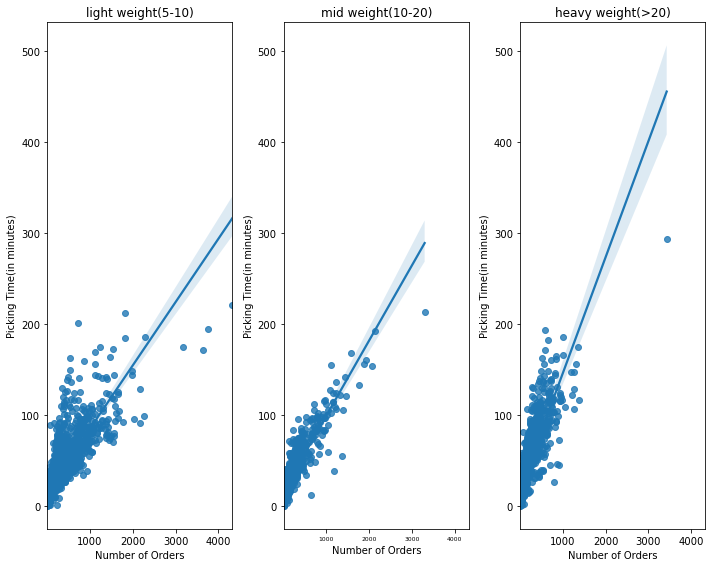

In [137]:
width = 10
height = 8
fig = plt.figure(figsize=(width, height))
#plt.xlim((0, 4000))
#plt.ylim((0, 350))
#plt.title('Order # vs Picking Time (weight:5-10)')
#plt.xlabel('Number of Orders')
#plt.ylabel('Picking Time(in minutes)')

#中等重量图
mid_weight = plt.subplot(132)   
mid_weight.set_title('mid weight(10-20)')
plt.setp(mid_weight.get_xticklabels(),fontsize=6)

sns.regplot(x="total_PickQty", y="duration", data=picking_lining2.loc[picking_lining2.categories == 'Mid'])


#轻重量图
light_weight = plt.subplot(131, sharex=mid_weight,sharey=mid_weight)
light_weight.set_title('light weight(5-10)')
sns.regplot(x="total_PickQty", y="duration", data=picking_lining2.loc[picking_lining2.categories == 'Light'])



#大重量图
heavy_weight = plt.subplot(133,sharex=mid_weight, sharey=mid_weight)
heavy_weight.set_title('heavy weight(>20)')
sns.regplot(x="total_PickQty", y="duration", data=picking_lining2.loc[picking_lining2.categories == 'Heavy'])
plt.tight_layout()

mid_weight.set_xlabel('Number of Orders')
mid_weight.set_ylabel('Picking Time(in minutes)')
light_weight.set_xlabel('Number of Orders')
light_weight.set_ylabel('Picking Time(in minutes)')
heavy_weight.set_xlabel('Number of Orders')
heavy_weight.set_ylabel('Picking Time(in minutes)')

plt.savefig('走线test.jpg')
plt.show()
plt.close()


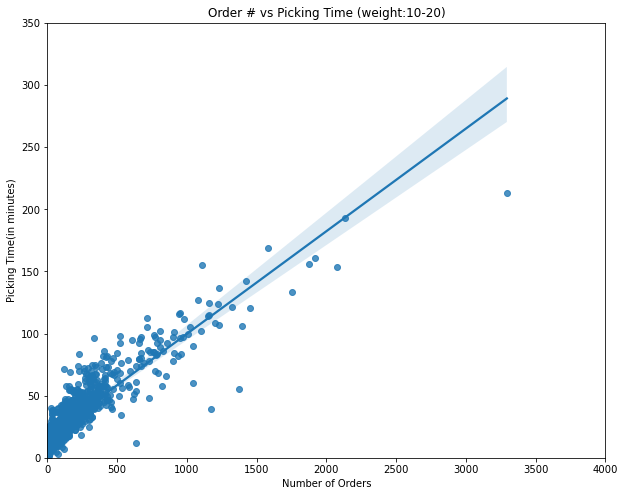

In [113]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="total_PickQty", y="duration", data=picking_lining2.loc[picking_lining2.categories == 'Mid'])
plt.xlim((0, 4000))
plt.ylim((0, 350))
plt.title('Order # vs Picking Time (weight:10-20)')
plt.xlabel('Number of Orders')
plt.ylabel('Picking Time(in minutes)')
plt.savefig('走线_中等重量.jpg')
plt.show()
plt.close()

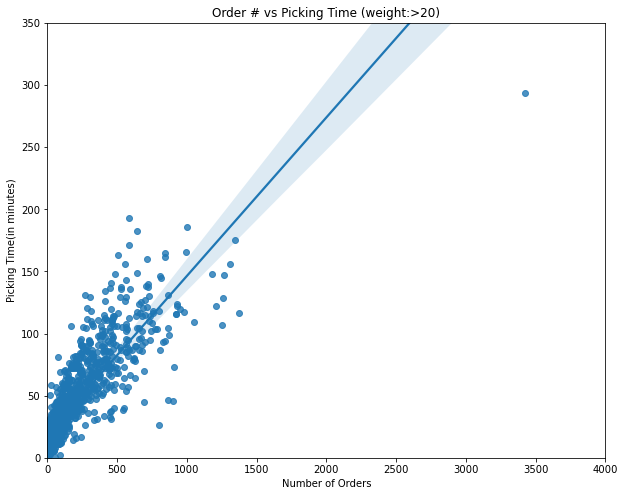

In [114]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="total_PickQty", y="duration", data=picking_lining2.loc[picking_lining2.categories == 'Heavy'])
plt.xlim((0, 4000))
plt.ylim((0, 350))
plt.title('Order # vs Picking Time (weight:>20)')
plt.xlabel('Number of Orders')
plt.ylabel('Picking Time(in minutes)')
plt.savefig('走线_大重量.jpg')
plt.show()
plt.close()

#### 投筐图

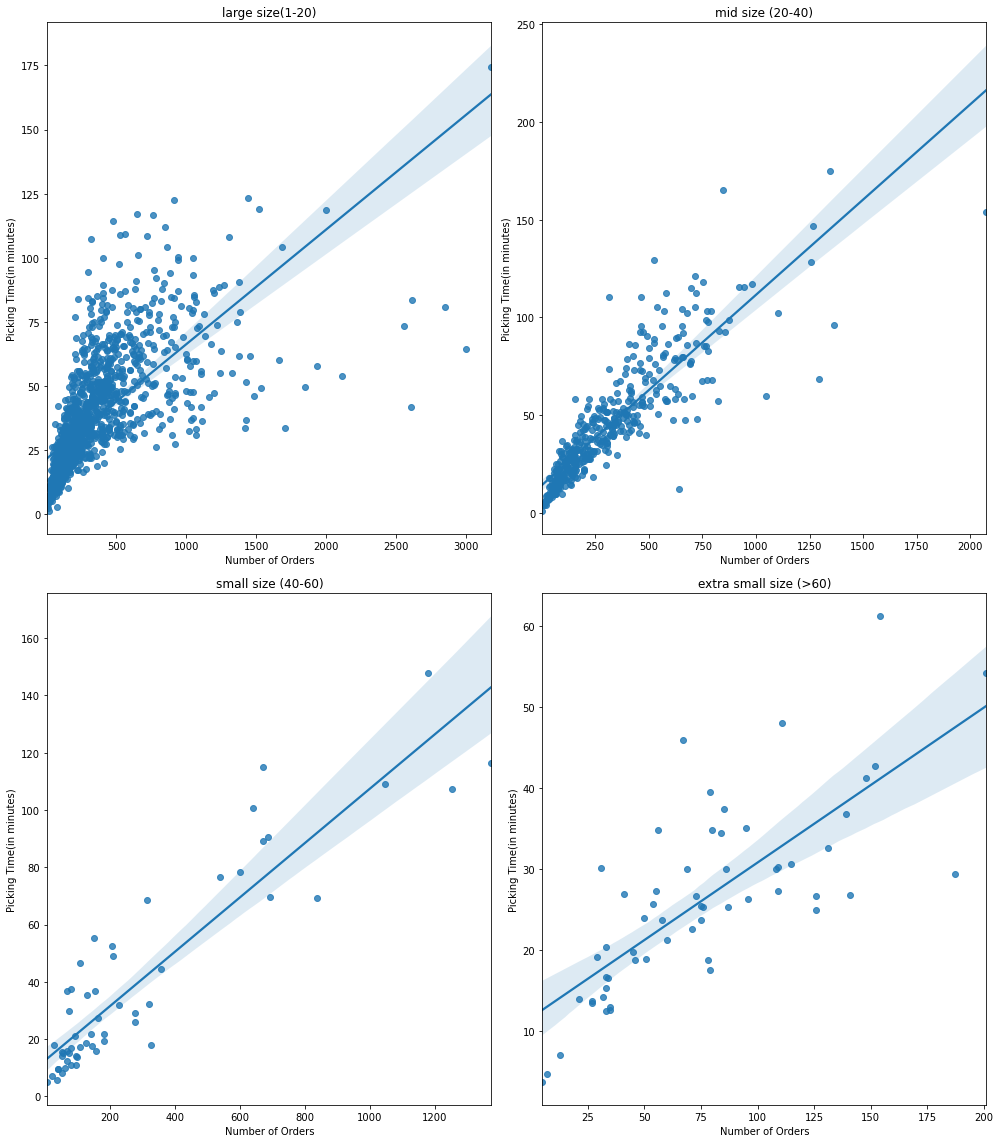

In [188]:
width = 14
height = 16
fig2 = plt.figure(figsize=(width, height))
#plt.xlim((0, 4000))
#plt.ylim((0, 350))
#plt.title('Order # vs Picking Time (weight:5-10)')
#plt.xlabel('Number of Orders')
#plt.ylabel('Picking Time(in minutes)')

#大规格图
large_size = plt.subplot(221)   
large_size.set_title('large size(6-20)')
sns.regplot(x="total_PickQty", y="duration", data=picking_bucket2.loc[picking_bucket2.categories == 'Large'])


#中等规格图
mid_size = plt.subplot(222)
mid_size.set_title('mid size (20-40)')
sns.regplot(x="total_PickQty", y="duration", data=picking_bucket2.loc[picking_bucket2.categories == 'Mid'])



#小规格图
small_size = plt.subplot(223)
small_size.set_title('small size (40-60)')
sns.regplot(x="total_PickQty", y="duration", data=picking_bucket2.loc[picking_bucket2.categories == 'Small'])
plt.tight_layout()

#超小规格图
extra_small_size = plt.subplot(224)
extra_small_size.set_title('extra small size (>60)')
sns.regplot(x="total_PickQty", y="duration", data=picking_bucket2.loc[picking_bucket2.categories == 'Extra_Small'])
plt.tight_layout()

large_size.set_xlabel('Number of Orders')
large_size.set_ylabel('Picking Time(in minutes)')
mid_size.set_xlabel('Number of Orders')
mid_size.set_ylabel('Picking Time(in minutes)')
small_size.set_xlabel('Number of Orders')
small_size.set_ylabel('Picking Time(in minutes)')
extra_small_size.set_xlabel('Number of Orders')
extra_small_size.set_ylabel('Picking Time(in minutes)')


plt.savefig('投筐_diff_axis.jpg')
plt.show()
plt.close()


In [200]:
sql_pertime = "SELECT d.DeliveryTime,d.SKU,d.PickQty,TIMESTAMPDIFF(second, d.StartPickingTime,d.EndPickingTime) as PickTime,a.OpAreaId as area_id,b.area_sku,b.skusn as sku,b.product_name,b.product_spec,b.category_id,b.category_name,b.vendor_code,a.DeliveryDate,b.sale_unit_qty,b.sale_stock_qty,c.stock_qty FROM (select OpAreaId,DeliveryDate,SkuSn from xsyx_logistics_product.tb_product_skusn_advance where OpAreaId=101 and DeliveryDate BETWEEN '2021-01-01' and '2021-02-01') a INNER JOIN xsyx_logistics_product.tb_product_skusn b on a.SkuSn=b.skusn and b.skusn_status<>'DELETED' LEFT JOIN xsyx_logistics_product.tb_product_storage_ref c on b.storage_ref_id =c.id AND c.unit_name is not null AND c.is_delete =0 INNER JOIN xsyx_f6_picking.t_product_pick d on b.skusn = d.SKU and d.OpAreaID = 101  and d.BatPickStatus = 3 and d.WID = 10139 and d.DeliveryTime BETWEEN '2021-01-01 00:00:00' and '2021-02-01 23:59:59' order by d.SKU" 

In [201]:
df_picktime_pertime = pd.read_sql(sql_pertime,conn)

In [207]:
df_picktime_pertime.sort_values(by='weight', ascending=False)

,DeliveryTime,SKU,PickQty,PickTime,area_id,area_sku,sku,product_name,product_spec,category_id,category_name,vendor_code,DeliveryDate,sale_unit_qty,sale_stock_qty,stock_qty,weight
17811,2021-01-05,001944142,13.0,185,101,0587078,001944142,康巴赫 蜂巢316L煎炒两用锅 直径30cm/个 送玻璃盖,直径30cm/个 送玻璃盖,852,23010锅碗瓢盆筷勺,0012299,2021-01-05,1,1,1.0,632.0
17810,2021-01-05,001944142,4.0,6,101,0587078,001944142,康巴赫 蜂巢316L煎炒两用锅 直径30cm/个 送玻璃盖,直径30cm/个 送玻璃盖,852,23010锅碗瓢盆筷勺,0012299,2021-01-05,1,1,1.0,632.0
17809,2021-01-05,001944142,1.0,15,101,0587078,001944142,康巴赫 蜂巢316L煎炒两用锅 直径30cm/个 送玻璃盖,直径30cm/个 送玻璃盖,852,23010锅碗瓢盆筷勺,0012299,2021-01-05,1,1,1.0,632.0
3070,2021-01-01,001892357,3.0,214,101,0643008,001892357,容声 BD/BC-309MD冷柜 1台 309L 0.7KWh/24h,1台 309L 0.7KWh/24h,907,26004白电系列,431321200001,2021-01-01,1,1,1.0,618.0
93830,2021-01-25,002246777,2.0,171,101,0643008,002246777,容声 BD/BC-309MD冷柜 1台 309L 0.7KWh/24h,1台 309L 0.7KWh/24h,907,26004白电系列,431321200001,2021-01-25,1,1,1.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81764,2021-01-22,002199711,112.0,551,101,0498103,002199711,华悦 原木纯品抽取式面巾纸 175X115mm 280张/包 32包/件,175X115mm 280张/包 32包/件,820,21003抽纸,0013692,2021-01-22,1,32,32.0,0.0
81763,2021-01-22,002199711,92.0,230,101,0498103,002199711,华悦 原木纯品抽取式面巾纸 175X115mm 280张/包 32包/件,175X115mm 280张/包 32包/件,820,21003抽纸,0013692,2021-01-22,1,32,32.0,0.0
81762,2021-01-22,002199711,113.0,477,101,0498103,002199711,华悦 原木纯品抽取式面巾纸 175X115mm 280张/包 32包/件,175X115mm 280张/包 32包/件,820,21003抽纸,0013692,2021-01-22,1,32,32.0,0.0
81761,2021-01-22,002199711,112.0,637,101,0498103,002199711,华悦 原木纯品抽取式面巾纸 175X115mm 280张/包 32包/件,175X115mm 280张/包 32包/件,820,21003抽纸,0013692,2021-01-22,1,32,32.0,0.0


In [203]:
df_picktime_pertime['weight'] =df_picktime_pertime.apply(lambda df_picktime_pertime:get_actual_weight(df_picktime_pertime['product_name'],df_picktime_pertime['sale_unit_qty'],df_picktime_pertime['sale_stock_qty']),axis=1) 

### 走线_perttime数据

In [205]:
picking_lining_pertime=df_picktime_pertime.loc[(df_picktime_pertime.weight>=5)|(df_picktime_pertime.sale_stock_qty==1)]

In [208]:
picking_lining_pertime2=picking_lining_pertime.copy()
bins = [5,10,20,632]
group_names =['Light','Mid','Heavy']
picking_lining_pertime2['categories']=pd.cut(picking_lining_pertime2['weight'],bins,labels=group_names)

### 走线图_pertime

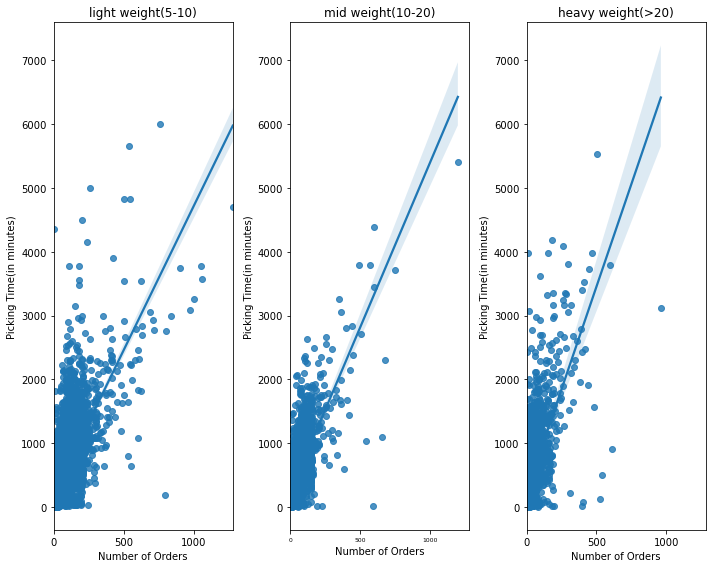

In [210]:
width = 10
height = 8
fig = plt.figure(figsize=(width, height))
#plt.xlim((0, 4000))
#plt.ylim((0, 350))
#plt.title('Order # vs Picking Time (weight:5-10)')
#plt.xlabel('Number of Orders')
#plt.ylabel('Picking Time(in minutes)')

#中等重量图
mid_weight = plt.subplot(132)   
mid_weight.set_title('mid weight(10-20)')
plt.setp(mid_weight.get_xticklabels(),fontsize=6)

sns.regplot(x="PickQty", y="PickTime", data=picking_lining_pertime2.loc[picking_lining_pertime2.categories == 'Mid'])


#轻重量图
light_weight = plt.subplot(131, sharex=mid_weight,sharey=mid_weight)
light_weight.set_title('light weight(5-10)')
sns.regplot(x="PickQty", y="PickTime", data=picking_lining_pertime2.loc[picking_lining_pertime2.categories == 'Light'])



#大重量图
heavy_weight = plt.subplot(133,sharex=mid_weight, sharey=mid_weight)
heavy_weight.set_title('heavy weight(>20)')
sns.regplot(x="PickQty", y="PickTime", data=picking_lining_pertime2.loc[picking_lining_pertime2.categories == 'Heavy'])
plt.tight_layout()

mid_weight.set_xlabel('Number of Orders')
mid_weight.set_ylabel('Picking Time(in minutes)')
light_weight.set_xlabel('Number of Orders')
light_weight.set_ylabel('Picking Time(in minutes)')
heavy_weight.set_xlabel('Number of Orders')
heavy_weight.set_ylabel('Picking Time(in minutes)')

plt.savefig('走线test_perttime.jpg')
plt.show()
plt.close()


### 投筐_pertime数据

In [211]:
picking_bucket_perttime=df_picktime_pertime.loc[(df_picktime_pertime.sale_stock_qty!=1)|(df_picktime_pertime.weight<5)]

In [212]:
picking_bucket_perttime2=picking_bucket_perttime.copy()
bins = [6,20,40,60,320]
group_names_bucket =['Large','Mid','Small','Extra_Small']
picking_bucket_perttime2['categories']=pd.cut(picking_bucket_perttime2['sale_stock_qty'],bins,labels=group_names_bucket)

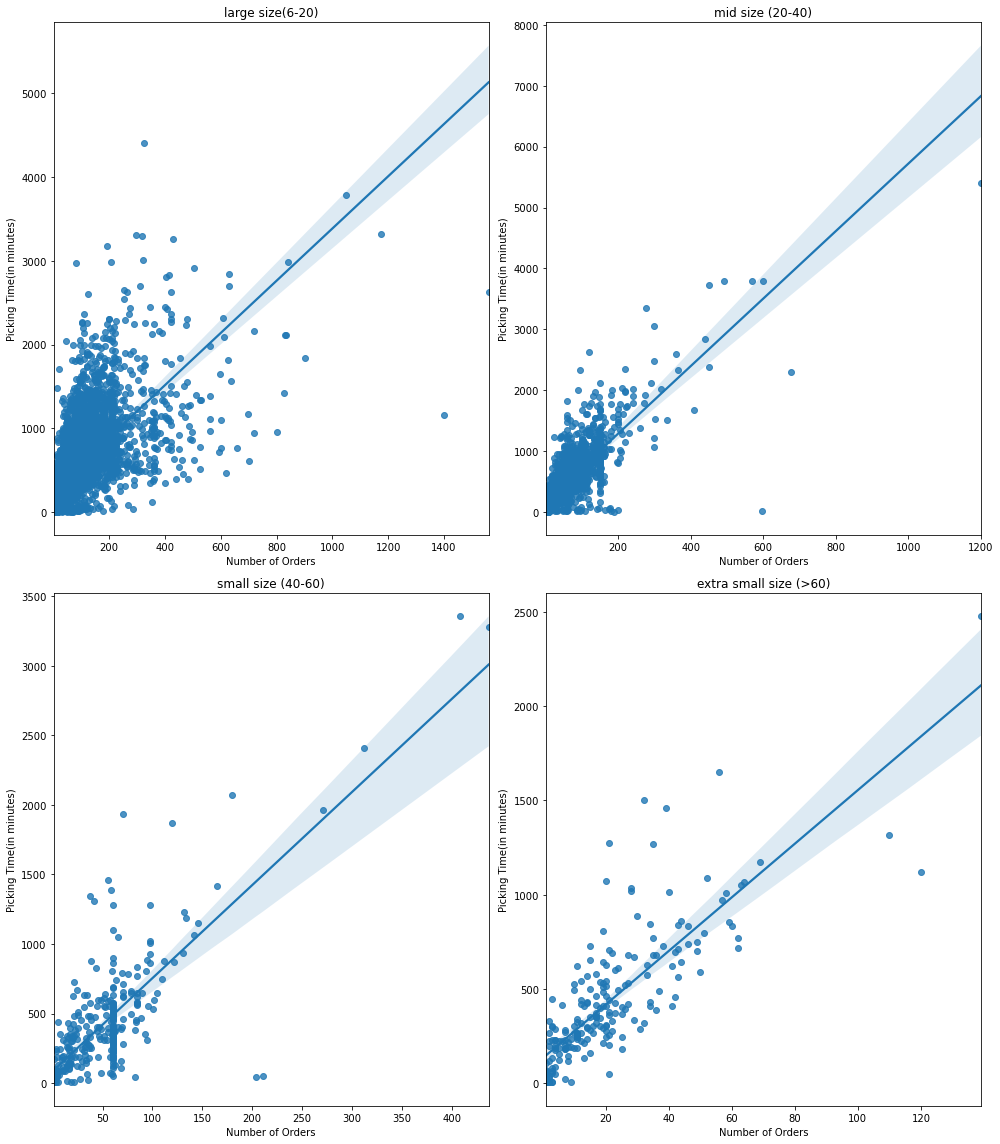

In [213]:
width = 14
height = 16
fig2 = plt.figure(figsize=(width, height))
#plt.xlim((0, 4000))
#plt.ylim((0, 350))
#plt.title('Order # vs Picking Time (weight:5-10)')
#plt.xlabel('Number of Orders')
#plt.ylabel('Picking Time(in minutes)')

#大规格图
large_size = plt.subplot(221)   
large_size.set_title('large size(6-20)')
sns.regplot(x="PickQty", y="PickTime", data=picking_bucket_perttime2.loc[picking_bucket_perttime2.categories == 'Large'])


#中等规格图
mid_size = plt.subplot(222)
mid_size.set_title('mid size (20-40)')
sns.regplot(x="PickQty", y="PickTime", data=picking_bucket_perttime2.loc[picking_bucket_perttime2.categories == 'Mid'])



#小规格图
small_size = plt.subplot(223)
small_size.set_title('small size (40-60)')
sns.regplot(x="PickQty", y="PickTime", data=picking_bucket_perttime2.loc[picking_bucket_perttime2.categories == 'Small'])
plt.tight_layout()

#超小规格图
extra_small_size = plt.subplot(224)
extra_small_size.set_title('extra small size (>60)')
sns.regplot(x="PickQty", y="PickTime", data=picking_bucket_perttime2.loc[picking_bucket_perttime2.categories == 'Extra_Small'])
plt.tight_layout()

large_size.set_xlabel('Number of Orders')
large_size.set_ylabel('Picking Time(in minutes)')
mid_size.set_xlabel('Number of Orders')
mid_size.set_ylabel('Picking Time(in minutes)')
small_size.set_xlabel('Number of Orders')
small_size.set_ylabel('Picking Time(in minutes)')
extra_small_size.set_xlabel('Number of Orders')
extra_small_size.set_ylabel('Picking Time(in minutes)')


plt.savefig('投筐_pertime.jpg')
plt.show()
plt.close()

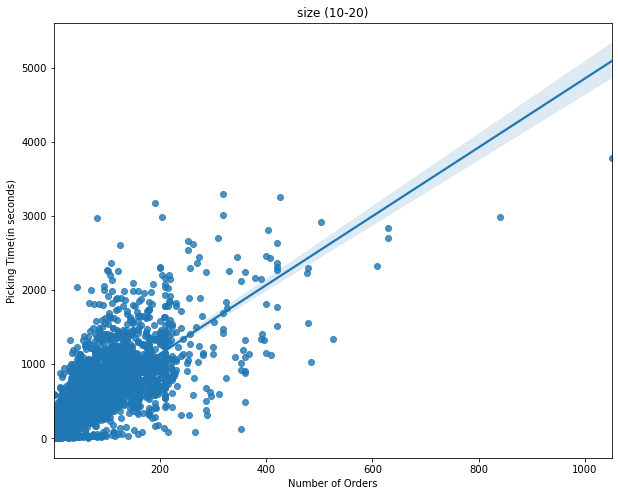

In [225]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="PickQty", y="PickTime", data=picking_bucket_perttime2.loc[(picking_bucket_perttime2.sale_stock_qty >10)&(picking_bucket_perttime2.sale_stock_qty <20)])
plt.title('size (10-20)')
plt.xlabel('Number of Orders')
plt.ylabel('Picking Time(in seconds)')
plt.savefig('投筐_10_20.jpg')
plt.show()
plt.close()